### **Multiple Plots in a Figure, using `Matplotlib`**  
* Simple example : time vs wind speed

#### **1.Load important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import display, HTML

import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')
sns.set_palette("Blues_r")

%matplotlib inline

* Nice representation of pandas dataframe as markdown

In [2]:
from IPython.display import Markdown, display

def df2md(df):    
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

#### **2.Set variables**

In [3]:
vCutIn = 4
vRated = 12
noutfile = 'output'
ninfile = 'measData_Hyosung_0118-0218.xls'

vMax = int(vRated + 4)
vMin = int(np.floor(vCutIn))
noutlog = noutfile + '.txt'
outlog = open(noutlog, 'w')

#### **3.1. Glancing on data**

In [4]:
data = pd.read_excel(ninfile)
data = data.iloc[:, :8]
df2md(data.head())

month|day|hour|minute|windDirValidation|powerValidation|meanWindSpeed|meanWindSpeedTenMinutes
---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043
1|18|0|1|1|0|9.321983706666611|9.098565504333349
1|18|0|2|1|0|9.699291810000195|9.210747028000025
1|18|0|3|1|0|8.507020326666794|9.232126642666683
1|18|0|4|1|0|9.689152010000056|9.329700709


#### **3.2. Shortening Column names, for ease**

In [5]:
data.rename(columns={
                     'windDirValidation':'dir', 
                     'powerValidation':'pow', 
                     'meanWindSpeed':'mean1',
                     'meanWindSpeedTenMinutes':'mean10'
                      }, inplace=True)
df2md(data.head())

month|day|hour|minute|dir|pow|mean1|mean10
---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043
1|18|0|1|1|0|9.321983706666611|9.098565504333349
1|18|0|2|1|0|9.699291810000195|9.210747028000025
1|18|0|3|1|0|8.507020326666794|9.232126642666683
1|18|0|4|1|0|9.689152010000056|9.329700709


#### **3.3. Adding a 'standard' Timestamp : 'indexMinutes'**

In [6]:
data['indexMinutes']= data['minute'] + 60*data['hour'] + 1440*(data['day']-18) + 44640*(data['month']-1)
df2md(data.head())

month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043|0
1|18|0|1|1|0|9.321983706666611|9.098565504333349|1
1|18|0|2|1|0|9.699291810000195|9.210747028000025|2
1|18|0|3|1|0|8.507020326666794|9.232126642666683|3
1|18|0|4|1|0|9.689152010000056|9.329700709|4


**3.3.1 Check : "Is the indexMinutes formular working properly?"**

In [7]:
print(data['indexMinutes'].max())
print(data.index.size)

46070
46021


* **maximum value of `indexMunutes` and data size does not match!**

**3.3.2. Further Check: "Is there missing data which results in larger `indexMinutes`?"**

In [8]:
for i in range(20100):
  if data['indexMinutes'].loc[i+1] - data['indexMinutes'].loc[i] > 1:
    df2md(data.loc[i-2:i+2])

month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|21|18|7|1|0|12.878672190000099|12.753364234333343|5407
1|21|18|8|1|0|12.105328079999992|12.730867705333342|5408
1|21|18|9|1|0|12.642122946666376|12.771113493333349|5409
1|21|18|15|1|0|13.257977526666936|12.790543501000064|5415
1|21|18|16|1|0|13.186538026666689|12.713785215000017|5416


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|21|23|52|0|0|11.131661466666994|11.907336194333306|5752
1|21|23|53|0|0|11.685294546666684|11.96921816466661|5753
1|21|23|54|0|0|12.517311226666333|11.904315762999953|5754
1|22|0|0|0|0|11.481346296666917|11.841086428333323|5760
1|22|0|1|0|0|10.56844166666666|12.006772296666625|5761


Proven to be TRUE.  
Keep going.

#### **3.4. Slicing Dataset, for Visualization Efficiency**

In [10]:
df1 = data.loc[:]

**3.4.1. Check Plot Feasibility**

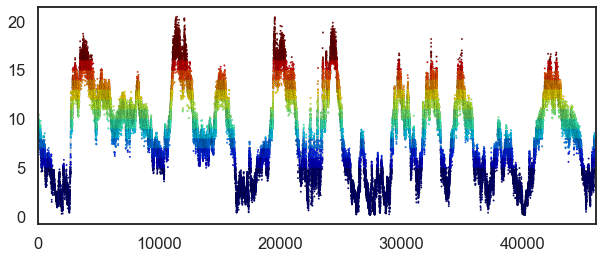

In [11]:
%matplotlib inline
font_time = fm.FontProperties(size = 4)
fig  = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(df1['indexMinutes'], df1['mean1'], 
           c=np.floor(df1['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax1.plot(df1['indexMinutes'], df1['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax1.set_xlim(df1['indexMinutes'].min(), df1['indexMinutes'].max())
plt.savefig('./WindAnalysis/images/data.png')

**3.4.2. Plot Preparation One by One**  
  
3.4.2.1. Filter by `Wind Direction`

In [12]:
df2 = df1.loc[df1['dir'] == 1]

In [13]:
print(df2.shape)
df2md(df2.head())

(27116, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043|0
1|18|0|1|1|0|9.321983706666611|9.098565504333349|1
1|18|0|2|1|0|9.699291810000195|9.210747028000025|2
1|18|0|3|1|0|8.507020326666794|9.232126642666683|3
1|18|0|4|1|0|9.689152010000056|9.329700709|4


* Missing data by `Wind Direction`

In [14]:
df2_miss = df1.loc[df1['dir'] == 0]
print(df2_miss.shape)
df2md(df2_miss.head(10))

(18905, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|13|42|0|0|5.200185733333339|5.522726625999989|822
1|18|13|43|0|0|6.000861213333301|5.568884224666662|823
1|18|13|44|0|0|5.941005666666772|5.485398335000005|824
1|18|13|45|0|0|5.999678236666705|5.522969366666663|825
1|18|13|46|0|0|5.689354266666526|5.499899785333338|826
1|18|13|47|0|0|4.718053606666666|5.488752150666675|827
1|18|13|48|0|0|4.823737976666672|5.612992354666669|828
1|18|13|49|0|0|5.630866056666617|5.659463365333331|829
1|18|13|50|0|0|5.533846606666677|5.626227866333335|830
1|18|14|39|0|0|5.887802443333319|6.172314476999999|879


3.4.2.2. Filter by `Power Generation`

In [15]:
df3 = df1.loc[df1['pow'] == 1]
print(df3.shape)
df2md(df3.head())

(24619, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|16|53|1|1|5.098772369999969|5.1713226389999845|1013
1|18|16|54|1|1|4.862361396666568|5.1015869326666605|1014
1|18|16|55|1|1|5.205255633333375|5.140628235333339|1015
1|18|16|56|1|1|5.734952640000007|5.118339111333343|1016
1|18|16|57|1|1|5.699770606666643|5.051514756666676|1017


* Missing data by `Power Generation`

In [16]:
df3_miss = df1.loc[df1['pow'] == 0]
print(df3_miss.shape)
df2md(df3_miss.head(10))

(21402, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043|0
1|18|0|1|1|0|9.321983706666611|9.098565504333349|1
1|18|0|2|1|0|9.699291810000195|9.210747028000025|2
1|18|0|3|1|0|8.507020326666794|9.232126642666683|3
1|18|0|4|1|0|9.689152010000056|9.329700709|4
1|18|0|5|1|0|9.794867106666851|9.326783211999977|5
1|18|0|6|1|0|8.924303823333334|9.32990811399996|6
1|18|0|7|1|0|9.51222786333323|9.292910134666627|7
1|18|0|8|1|0|7.6778305000000024|9.188566983666604|8
1|18|0|9|1|0|7.442725409999975|9.314997998999932|9


3.4.2.3. Filter by `Wind Speed`

In [17]:
df4 = df1.loc[df1['mean1'] < 16].loc[df1['mean1'] >= 4]
print(df4.shape)
df2md(df4.head())

(34889, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|0|0|1|0|10.355213963333378|9.092461652000043|0
1|18|0|1|1|0|9.321983706666611|9.098565504333349|1
1|18|0|2|1|0|9.699291810000195|9.210747028000025|2
1|18|0|3|1|0|8.507020326666794|9.232126642666683|3
1|18|0|4|1|0|9.689152010000056|9.329700709|4


* Missing data by `Wind Speed`

In [18]:
df4_miss1 = df1.loc[df1['mean1'] < 3.5]
df4_miss2 = df1.loc[df1['mean1'] >= 16]
df4_miss = pd.concat([df4_miss1, df4_miss2])
print(df4_miss.shape)
df2md(df4_miss.head(10))

(9505, 9)


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|18|10|29|1|0|3.2978670733334075|4.291400013000014|629
1|18|10|39|1|0|3.344771330000074|3.8649753329999994|639
1|18|10|40|1|0|3.3566779133333613|3.86031563399999|640
1|18|10|48|1|0|3.1372587866666533|3.5681664873333228|648
1|18|10|49|1|0|3.298174339999972|3.681678475666655|649
1|18|10|50|1|0|3.0452631466666196|3.812017922999992|650
1|18|10|51|1|0|3.1775414466666345|3.909140307333339|651
1|18|10|55|1|0|3.0305297100000486|4.030516786000005|655
1|18|11|15|1|0|3.2401623933333026|4.1626568160000055|675
1|18|11|20|1|0|3.2805218700000776|4.154399024333347|680


3.4.2.4. Filter by `Wind Direction, Power and Speed`

In [19]:
df5 = df4.loc[df1['pow'] * df1['dir']== 1]
print(df5.shape)
df5.head()

(14550, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
1013,1,18,16,53,1,1,5.098772,5.171323,1013
1014,1,18,16,54,1,1,4.862361,5.101587,1014
1015,1,18,16,55,1,1,5.205256,5.140628,1015
1016,1,18,16,56,1,1,5.734953,5.118339,1016
1017,1,18,16,57,1,1,5.699771,5.051515,1017


3.4.2.5. Filter by `IEC61400-13`

In [95]:
df_size = df1.shape[0]
print(df_size)

df6 = df1.loc[:]

df_IEC = pd.DataFrame()

for i in range(df_size//10):  
  df_tmp = df6.loc[i*10:(i+1)*10]
  chk_pow = (df_tmp['pow'].all() != 0)
  chk_dir = (df_tmp['dir'].all() != 0)
  chk_vWind1 = (df_tmp['mean10'] > 3.5).all()
  chk_vWind2 = (df_tmp['mean10'] <= 16).all()
  
  if (chk_pow * chk_dir * chk_vWind1 * chk_vWind2):
    df_IEC = pd.concat([df_IEC, df_tmp], axis=0)

df2md(df_IEC.head())
print(df_IEC.shape)



46021


month|day|hour|minute|dir|pow|mean1|mean10|indexMinutes
---|---|---|---|---|---|---|---|---
1|21|8|30|1|1|9.306896913333443|8.86669439600001|4830
1|21|8|31|1|1|8.582992009999952|8.84951665300002|4831
1|21|8|32|1|1|8.548055790000033|8.880801008666701|4832
1|21|8|33|1|1|7.784144766666686|8.949409046333367|4833
1|21|8|34|1|1|9.130894566666617|9.197944762333357|4834


(13827, 9)


In [96]:
df6 = df_IEC

**3.4.3. Plots**  

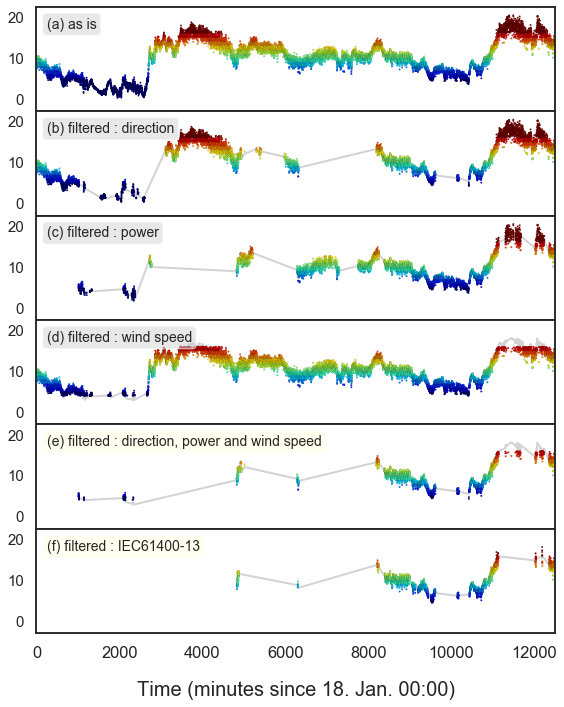

In [110]:
%matplotlib inline

fig, axes = plt.subplots(figsize=(8, 10), nrows=6, ncols=1, sharex=True)

texts = [
        '(a) as is',
        '(b) filtered : direction',
        '(c) filtered : power',
        '(d) filtered : wind speed',
        '(e) filtered : direction, power and wind speed',
        '(f) filtered : IEC61400-13'
        ]

def windplot(df,    # pandas DataFrame
             ax     # axes number
             ):
        axes[ax].scatter(df['indexMinutes'], df['mean1'], 
                         c=np.floor(df['mean1']), 
                         cmap='jet',
                         linewidth=0.1, s=3, edgecolor='k',
                         vmin=vCutIn, vmax=vMax, 
                         zorder=1)
        axes[ax].plot(df['indexMinutes'], df['mean10'], linewidth=2, color='lightgrey',zorder=0)
        axes[ax].set_xlim(0, 12500)
        axes[ax].set_ylim(-3, df1['mean1'].max()*1.1)
        axes[ax].tick_params(axis='y', labelsize=15)
        
        boxcolor = 'lightgrey' if ax < 4 else 'lightyellow'
        boxprops = dict(boxstyle='round', facecolor=boxcolor, alpha=0.5)
        axes[ax].text(0.02, 0.9, texts[ax], transform=axes[ax].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)

for i in range(6):
    windplot(eval('df' + str(i+1)), i)

axes[4].tick_params(axis='x', labelsize=15)                                       
plt.xlabel('Time (minutes since 18. Jan. 00:00)', labelpad = 20, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.savefig('./WindAnalysis/images/winds_IEC.png', dpi=200)
plt.show()

#### **3.5. Analysis : Data Loss by Filtering**
**3.5.1. Count Number of Data**

In [98]:
no1 = data.index.size
print('(a) # of all data= {}'.format(no1))

data2 = data.loc[data['dir'] == 1]
no2 = data2.index.size
print('(b) # of dir filtered = {}'.format(no2))

data3 = data.loc[data['pow'] == 1]
no3 = data3.index.size
print('(c) # of pow filtered = {}'.format(no3))

data4 = data.loc[data['mean10'] < 16].loc[data['mean10'] >= 4]
no4 = data4.index.size
print('(d) # of wind speed filtered = {}'.format(no4))

data5 = data4.loc[data['dir'] * data['pow'] == 1]
no5 = data5.index.size
print('(e) # of direction, power and wind speed filtered = {}'.format(no5))

data6 = df6
no6 = data6.index.size
print('(f) # of IEC61400-13 filtered = {}'.format(no6))

(a) # of all data= 46021
(b) # of dir filtered = 27116
(c) # of pow filtered = 24619
(d) # of wind speed filtered = 35066
(e) # of direction, power and wind speed filtered = 14564
(f) # of IEC61400-13 filtered = 13827


**3.5.2. Plot Bar Graph with Proportions**

[-0.4, 0.6, 1.6, 2.6, 3.6, 4.6]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


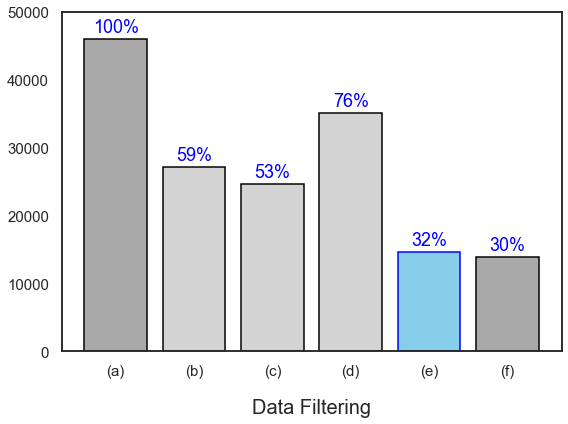

In [111]:
X = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
Y = [no1, no2, no3, no4, no5, no6]
Yp = np.array(Y)/no1 * 100

fig, ax = plt.subplots(figsize=(8, 6))
f = ax.bar(X, Y, color='lightgrey', edgecolor='black')

pos = [h.get_x() for h in f.patches]
ws = [h.get_width() for h in f.patches]

f.patches[0].set_color('darkgrey')
f.patches[0].set_edgecolor('black')
f.patches[4].set_color('skyblue')
f.patches[4].set_edgecolor('blue')
f.patches[5].set_color('darkgrey')
f.patches[5].set_edgecolor('black')
print(pos)
print(ws)

for i in range(len(Yp)):
  ax.text(pos[i]+ws[i]/2, Y[i]+1000, '{:>.0f}%'.format(Yp[i]), fontsize=18, color='blue', ha='center')
  
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(0, 50000)
ax.set_xlabel('Data Filtering', labelpad = 20, fontsize=20)

plt.tight_layout()
plt.savefig('./WindAnalysis/images/num_data_IEC.png', dpi=200)